<a href="https://colab.research.google.com/github/gtbnhyujmj2003/Aidea-AOI/blob/master/%5BAidea%5D%5BAOI%5D%5B05%5D%20VGG16%20-%20%5BNo%20VGG16%20Preprocessed%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
# 因為圖片實在太多，所以要用壓縮檔載入

import zipfile

f = zipfile.ZipFile("./drive/My Drive/AOI/train_images.zip")
f.extractall("./datasets")

In [0]:
# 圖片都混在一起了，分類一下

import os
import pandas as pd
from glob import glob

# 取得檔案路徑
imagePaths = glob('/content/datasets/train_images/*')

# 取得分類答案
imageAns = pd.read_csv("./drive/My Drive/AOI/train.csv")

In [0]:
# 創新資料夾

for class_num in range(6):
  DATASET_PATH = '/content/train_images/'
  class_folders = DATASET_PATH + str(class_num)

  # exist_ok：只有在目录不存在时创建目录，目录已存在时不会抛出异常。
  os.makedirs(class_folders, exist_ok=True)

In [0]:
# 移動檔案

import shutil

for class_num in range(6):
  class00 = imageAns[imageAns["Label"] == class_num]
  class_list = class00["ID"]
  # print(class_list)

  for c in class_list:
    shutil.move('/content/datasets/train_images/' + str(c), 
                '/content/train_images/' + str(class_num) + "/" + str(c))

In [0]:
# Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
Generator = ImageDataGenerator(rescale= 1. / 255.0,
                               validation_split= 0.2)

In [7]:
TrainFlowGenerator = Generator.flow_from_directory(
    directory= "/content/train_images/",
    target_size= (224, 224),
    class_mode= "sparse", 
    # color_mode="rgb",
    subset= "training")

ValidFlowGenetator = Generator.flow_from_directory(
    directory= "/content/train_images/",
    target_size= (224, 224),
    class_mode= "sparse", 
    # color_mode="grayscale",
    subset= "validation")

Found 2025 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [0]:
# cnn = VGG16

from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, GlobalAveragePooling2D

cnn = VGG16(include_top=False, input_shape=(224, 224, 3))

for l in cnn.layers:
    l.trainable = False

# x = MaxPooling2D()
x = Flatten()(cnn.output)
x = Dense(1024, activation=LeakyReLU(alpha=0.2),)(x)
x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
x = Dense(64, activation=LeakyReLU(alpha=0.2))(x)
out = Dense(6, activation="softmax")(x)

model = Model(inputs=cnn.input, outputs=out)
# model.summary()

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer= Adam(learning_rate=0.0001),
              loss= SparseCategoricalCrossentropy(),
              metrics= ['accuracy'],)

In [0]:
# 感謝上帝，這裡是模型。

from keras.callbacks import EarlyStopping

# EarlyStopping = EarlyStopping(monitor='val_loss', patience=50)

# 2528/32 = 79
history = model.fit(TrainFlowGenerator, epochs=50, verbose=2,
                    validation_data= ValidFlowGenetator, 
                    # validation_steps= 7,
                    # callbacks=[EarlyStopping],
         )

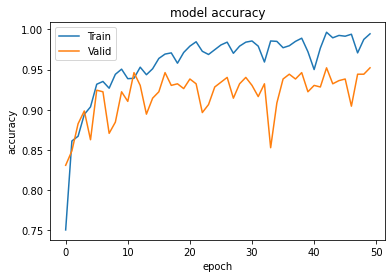

In [11]:
# accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['Train', 'Valid'], loc='upper left') 
plt.show()

In [0]:
# 載入 真．驗證資料
import zipfile

f = zipfile.ZipFile("./drive/My Drive/AOI/test_images.zip")
f.extractall("./datasets_test/")

In [13]:
TestFlowed = Generator.flow_from_directory(
    directory = "/content/datasets_test/",
    target_size= (224, 224),
    class_mode= None,
    shuffle= False, 
    # color_mode= "grayscale",
    # batch_size= 10)
    )

Found 10142 images belonging to 1 classes.


In [14]:
predict = model.predict(TestFlowed, verbose=1).argmax(axis=-1)
# predict.shape
# list(pre)

317/317 [==============================] - 41s 131ms/step


In [0]:
# 預言文件

import pandas as pd

result = pd.read_csv("./drive/My Drive/AOI/test.csv")

result["Label"] = list(predict)

In [0]:
# 存檔 上傳Aidea 拿成績
result.to_csv("/content/drive/My Drive/Result.csv", encoding="UTF8", index=False)

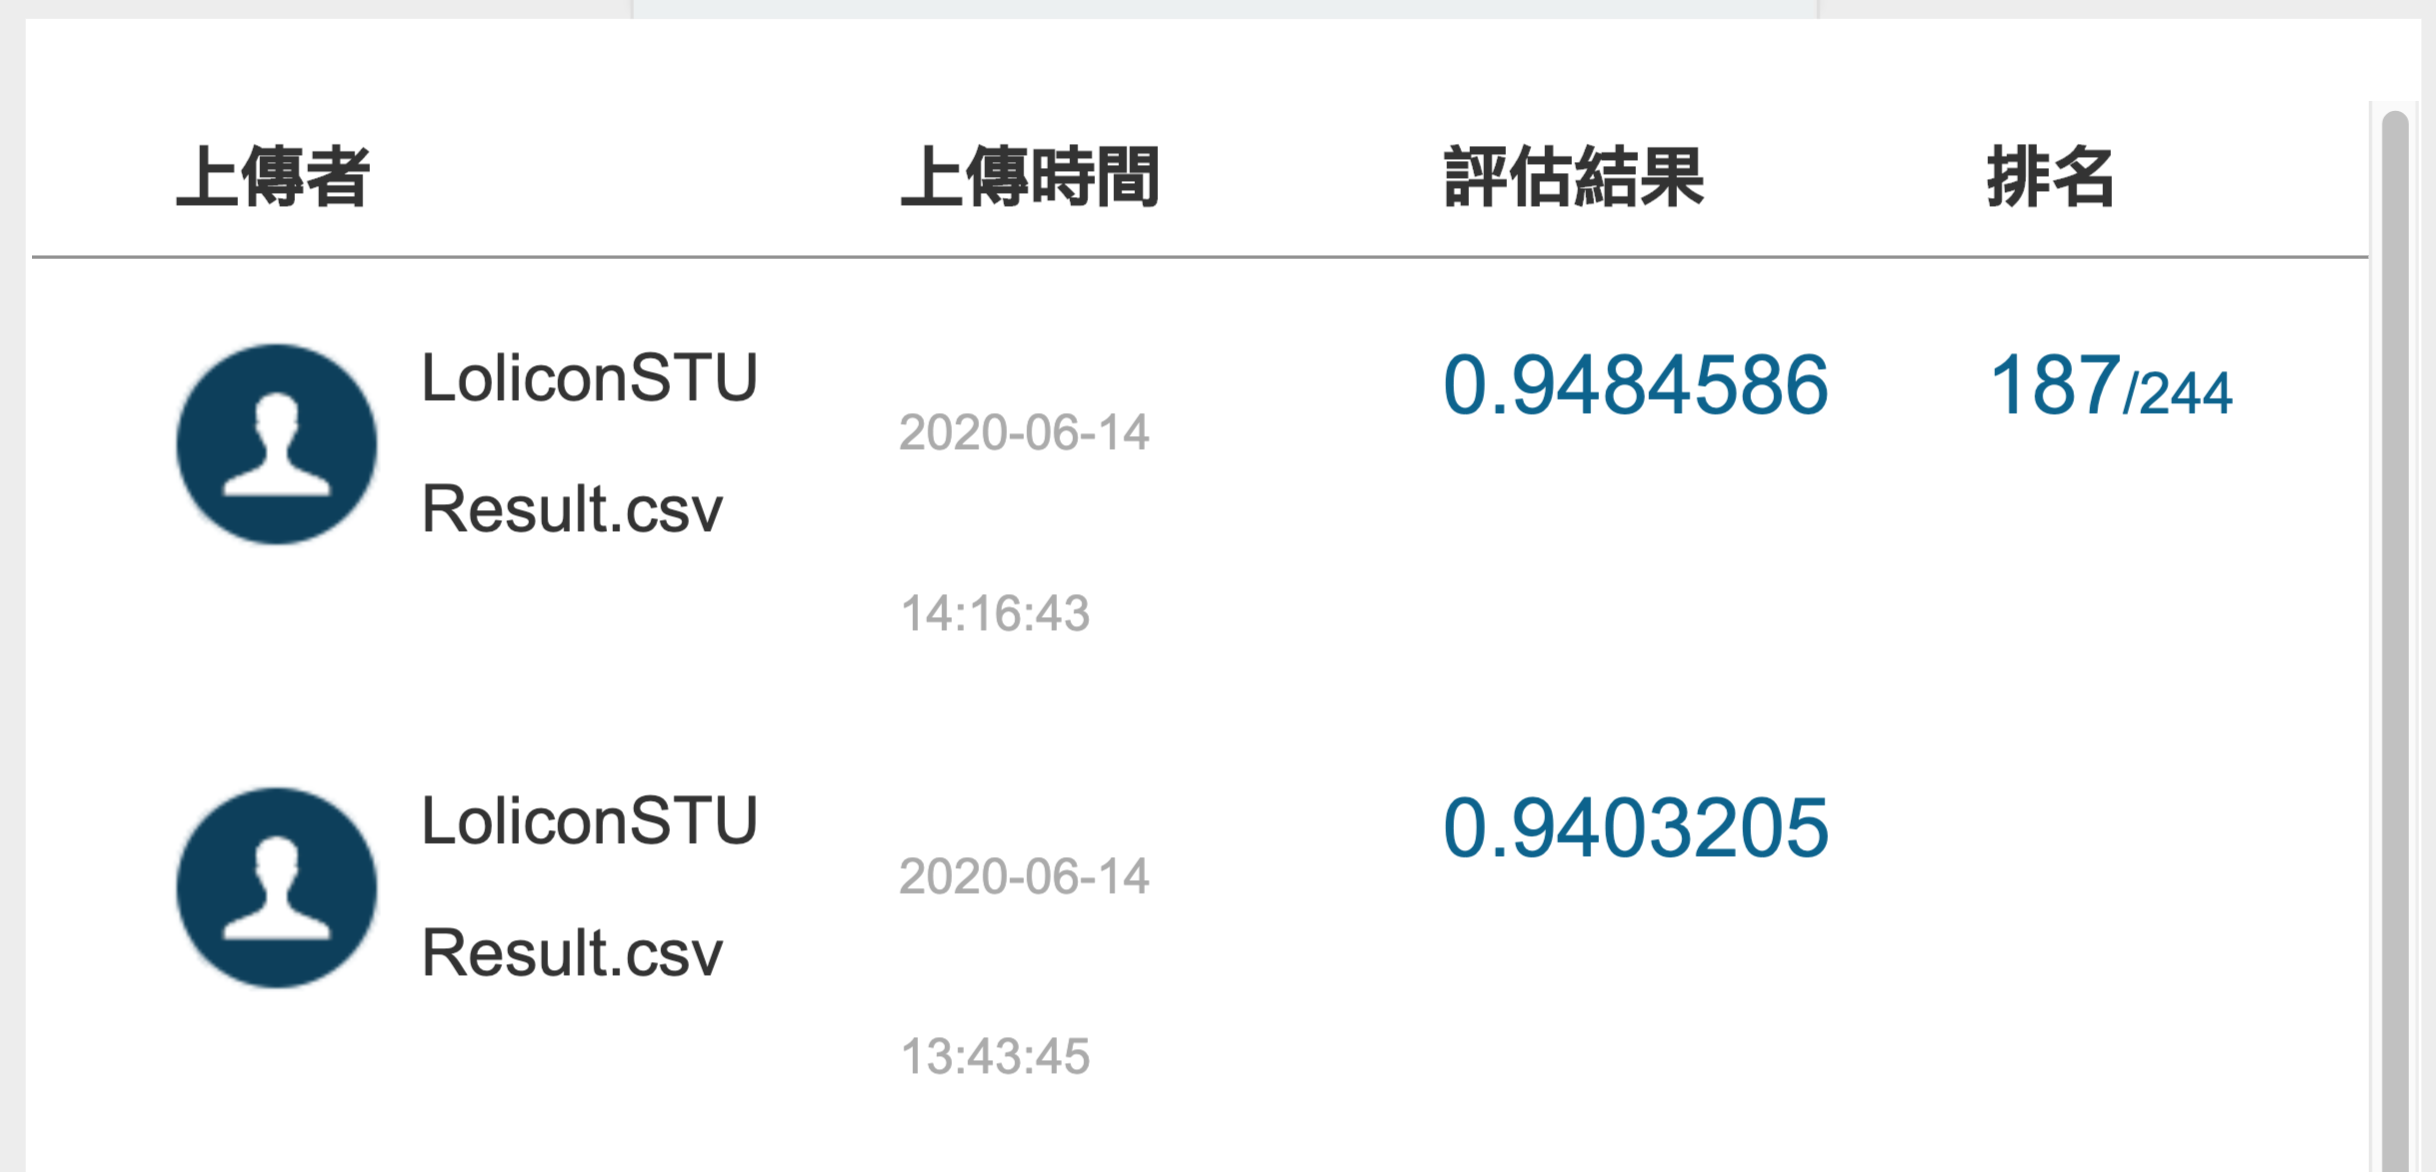

In [20]:
from tensorflow.keras.preprocessing.image import load_img

load_img('/content/drive/My Drive/GG/AA.png')